# Lab 8: James Lawson

<font size = '5' color='Red'>
Final score: 14.5/15
</font>

Part of this laboratory is based on material you have learned in class. However, a large portion of a data scientist's job is to study documentation and research additional materials. To make you prepared for such a constantly changing data landscape, several problems in this or other labs may rely on functions and methods which haven't been covered in class. A large portion of this assignment grade will be reflecting your ability to adapt new functions and methods using documentation and/or online resources. 

For example: if you needed to know how to take the square root of a number in Python, you could google: 'square root function python'. This search would direct you to the function sqrt() in the math library.

**Directions:**

Please compose your code in the appropriate Jupyter Notebook cell below the problem desription. Make sure to provide a printout in requested format.

**Lab Policies**:

   -   If your running your code leads to an **error message**, your grade for this code will be **reduced by 100%**.

   -  To get full credit for each  problem, your code should produce a neat and informative output. Depending on the problem, you will be asked to produce either informative printout or type a written conclusion. If you were asked to calculate the number of instances of the letter 'e' in the string: 'Old MacDonald had a farm.', your printout would look say something like: 'Number of 'e' characters in the string = 0'. See specific details in the individual problem descriptions.

   - Data for each problem are given to you in the format most convenient to the data collector. It is not necessarily (and in fact almost never) the most convenient format for data analysis. You can choose to either to work with the given format or convert it to any of the other variable types studied in class. However, you are not allowed to just re-type the data. All type conversions should be done algorithmically.

   - You are welcome to consult with your classmates and ANY online resources while working on this lab. Feel free to adapt (copy and paste and then change) any code from pre-class tutorials and workshops. It is never useful to needlessly duplicate effort.

# Data

In this lab, you will once again use data from Peter and Rosemary Grant's observations of the Galapagos finches on Daphne Major.

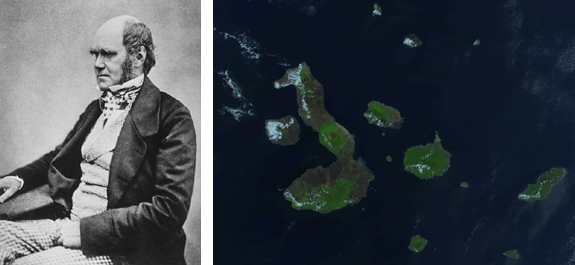

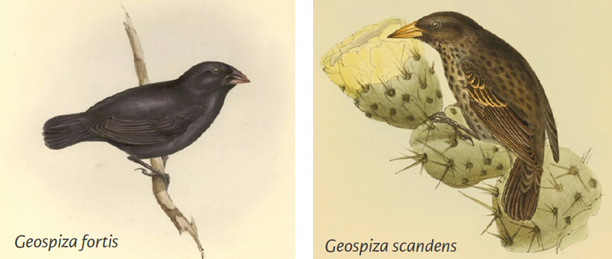

The Grants have monitored them every year, tagging them, making physiological measurements, taking samples for genetic sequencing and more. In 2014, they published a book entitled "40 years of Evolution: Darwin's Finches on Daphne Major Island". They generously placed all of their data in the [Dryad data repository](https://datadryad.org/resource/doi:10.5061/dryad.g6g3h), making it free for anyone to use. The data set is impressive and a great set for applying data science and statistical inference to learn about evolution.

You will work with the Grants' measurements of the beak length and beak depth. You will consider different aspects of the beak geometry, including how it varies over time from species to species.

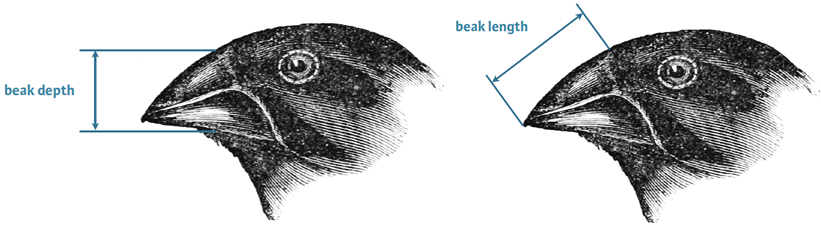

##  Problem 1 : Parameter estimates of beak depths

### (A)  Plot ECDFs and means of beak depth for 1975 and 2012

You are provided with the following file: 
- **finch_beaks.csv** contains data for both species for the individual years of 1975 and 2012.  Note: the column "species" of the file contains categorical variables for the species of the finches (scandens, or fortis). 

Plot ECDFs for beak depth of the *G. scandens* samples from 1975 and 2012 in different colors on the same graph. Calculate the means of the *G. scandens* samples from 1975 and 2012 and plot them as a dashed line on the same graph as the ECDFs. Be sure to include informative axis titles and a legend.

In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

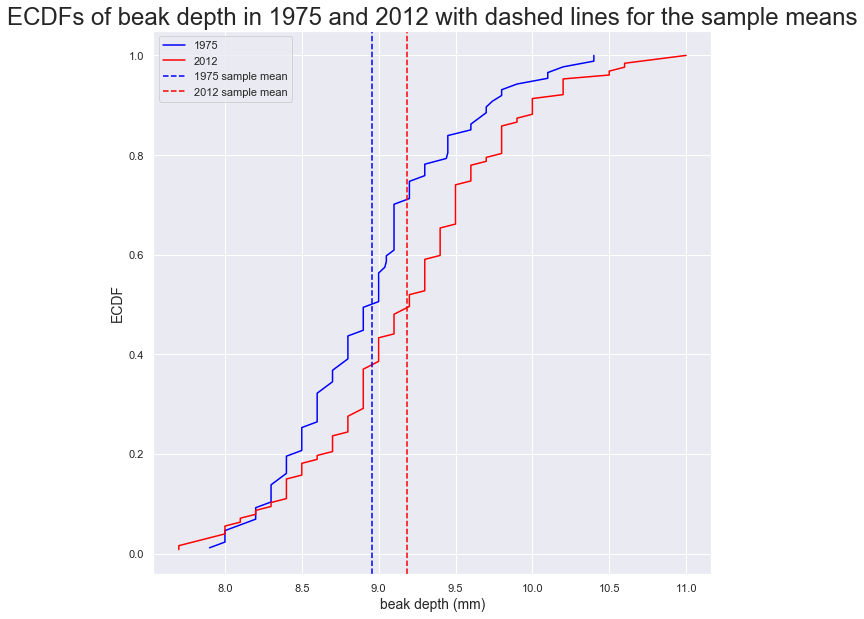

In [14]:
#import all necessary libraries
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

#use seaborn plotting settings
sns.set()

# Import datasets
df = pd.read_csv('finch_beaks.csv')

#figure size is set
plt.figure(figsize = (10, 10))

#data frame with only the species scandens is created
dfSpecific = df[df.species == "scandens"]

#data frame with 1975 data and 2012 data are created
dfSpecific1975 = dfSpecific[dfSpecific.year == 1975]
dfSpecific2012 = dfSpecific[dfSpecific.year == 2012]

#ecdf function is called on the beak depth of the 1975 and 2012 data
X1975, Y1975 = ecdf(dfSpecific1975.bdepth)
X2012, Y2012 = ecdf(dfSpecific2012.bdepth)

#data is plotted with 1975 in blue and 2012 in red
plt.plot(X1975, Y1975, label="1975", color = "blue")
plt.plot(X2012, Y2012, label="2012", color = "red")

#title is added
plt.title("ECDFs of beak depth in 1975 and 2012 with dashed lines for the sample means", fontsize = 24)

#x and y label are created
plt.xlabel("beak depth (mm)", fontsize = 14)
plt.ylabel("ECDF", fontsize = 14)

#mean is calculated
m1 = np.mean(dfSpecific1975.bdepth)
m2 = np.mean(dfSpecific2012.bdepth)


#dashed lines are plotted
plt.axvline(x = m1, color = "blue", linestyle='--', label = '1975 sample mean')
plt.axvline(x = m2, color = "red", linestyle='--', label = '2012 sample mean')

#legend is created
plt.legend(loc="best")

#plot is shown
plt.show()

### (B) Calculate a 95% confidence interval for beak depth

Estimate the difference of the mean beak depth of the *G. scandens* samples from 1975 and 2012 and  report a 95% confidence interval by taking 10,000 bootstrap replicates. In otherwords, generate an array of 10,000 bootstrap means for 1975, another bootstrap array for 2012, and generate the confidence interval from a new array of the difference between those bootstrap mean arrays. Provide clear printout in plain English of the difference between the means and a 95% confidence interval for difference between the means.

In [3]:
def bootstrap_replicate_1d(data, func):
    # Chosse entries out of the data array
    bs_sample = np.random.choice(data, len(data))
    # Compute statistics using specify function and return the result
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [4]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates1975 = draw_bs_reps(dfSpecific1975.bdepth, np.mean, 10000)
bs_replicates2012 = draw_bs_reps(dfSpecific2012.bdepth, np.mean, 10000)

#diff between means is calculated
diff_means = np.mean(dfSpecific1975.bdepth) - np.mean(dfSpecific2012.bdepth)

#print statement
print("The difference between the means of 1975 beak depth and 2012 beak depth is:", diff_means)

#confidence intervals are calculated for 1975 and 2012
conf_int1975 = np.percentile(bs_replicates1975, [2.5, 97.5])
conf_int2012 = np.percentile(bs_replicates2012, [2.5, 97.5])

#confidence intervals for the difference between the means is calculated
conf_intBetween = conf_int1975 - conf_int2012

#print statement
print('95% confidence interval for the difference between the means:', conf_intBetween)

The difference between the means of 1975 beak depth and 2012 beak depth is: -0.2262204724409429
95% confidence interval for the difference between the means: [-0.22686322 -0.22158928]


#### Conclusion

*Comment on differences between the distributions of beak depths in the years 1975 and 2012 by interpreting your confidence interval in the context of the problem. (2-4 sentences)*

The mean difference in beak depth is smaller in 2012 when compared to 1975. The 95% confidence interval is very small with a difference of around 0.009.

##  Problem 2 : Parameter estimates of beak length

Plot an ECDF for beak length of the *G. scandens* samples from 1975 and 2012 together with dashed lines for the sample means. 

Estimate the difference of the mean beak length of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval by taking 10,000 bootstrap replicates.

Provide clear printout of the difference between the means and a 95% confidence interval. 

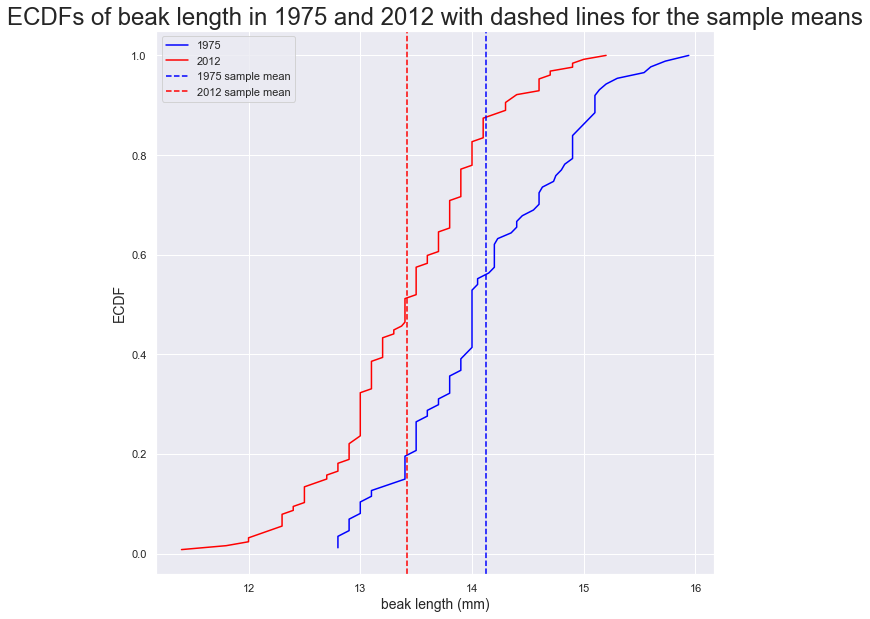

The difference between the means of 1975 beak length and 2012 beak length is: 0.6998959181826354
95% confidence interval for the difference between the means: [0.6709221  0.72887592]


In [5]:
#figure size is set
plt.figure(figsize = (10, 10))

#ecdf function is called on the beak length of the 1975 and 2012 data
X1975, Y1975 = ecdf(dfSpecific1975.blength)
X2012, Y2012 = ecdf(dfSpecific2012.blength)

#data is plotted with 1975 in blue and 2012 in red
plt.plot(X1975, Y1975, label="1975", color = "blue")
plt.plot(X2012, Y2012, label="2012", color = "red")

#title is added
plt.title("ECDFs of beak length in 1975 and 2012 with dashed lines for the sample means", fontsize = 24)

#x and y label are created
plt.xlabel("beak length (mm)", fontsize = 14)
plt.ylabel("ECDF", fontsize = 14)

#means are calculated
mean1 = np.mean(dfSpecific1975.blength)
mean2 = np.mean(dfSpecific2012.blength)

#dashed lines are plotted
plt.axvline(x = mean1, color = "blue", linestyle='--', label = '1975 sample mean')
plt.axvline(x = mean2, color = "red", linestyle='--', label = '2012 sample mean')

#legend is created
plt.legend(loc="best")

#plot is shown
plt.show()



# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates1975 = draw_bs_reps(dfSpecific1975.blength, np.mean, 10000)
bs_replicates2012 = draw_bs_reps(dfSpecific2012.blength, np.mean, 10000)

#diff between means is calculated
diff_means = np.mean(dfSpecific1975.blength) - np.mean(dfSpecific2012.blength)

#print statement
print("The difference between the means of 1975 beak length and 2012 beak length is:", diff_means)

#confidence intervals are calculated for 1975 and 2012
conf_int1975 = np.percentile(bs_replicates1975, [2.5, 97.5])
conf_int2012 = np.percentile(bs_replicates2012, [2.5, 97.5])

#confidence intervals for the difference between the means is calculated
conf_intBetween = conf_int1975 - conf_int2012

#print statement
print('95% confidence interval for the difference between the means:', conf_intBetween)

#### Conclusion

*Comment on differences between distributions of beak lengths and depth in the years 1975 and 2012 by interpreting your confidence interval in the context of the problem. (2-4 sentences)*


#The mean beak depth is larger in 2012 when compared to 1975. The 95% confidence interval is relatively large with a difference of around 0.071.

## Problem 3: Hypothesis test

### (A) Distribution of replicates for mean beak difference

You probably discovered some difference in beak depth. But is it possible that this effect is just due to random chance? 

Let's use a permutation test to test the null hypothesis that the true distributions of beak depths are the same in both years. I have put our user-defined functions for permutation_sample() and draw_perm_reps below. By calling draw_perm_reps(), with input of two arrays of data, a function (in this case, we are interested in the mean beak depth) and a size (let's do a permutation test with 10,000 replicates), we return an array of average beak depths for 10,000 permuted data sets, under the null hypothesis assumption that the distributions are the same. Then we can calculate our p-value as the percent of times out of 10,000 that the simulated data under the null hypothesis resulted in a difference as extreme or more extreme than the observed 1975 vs. 2012 difference.

For your convenience, I have also included below a user-defined function named diff_of_means that we defined in the Lecture 15 workshop. It takes in two arrays and returns the difference of their means. We can pass this function to draw_perm_reps.

What is the probability that we would get the observed difference in mean beak depth if the means were the same? Calculate a p-value to answer this question and provide informative printout. 

In [6]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [7]:
#compute the observed difference in means
diff_obs = diff_of_means(dfSpecific1975.bdepth, dfSpecific2012.bdepth)

#acquire 10,000 permutation replicates of difference in means
perm_replicates = draw_perm_reps(dfSpecific1975.bdepth, dfSpecific2012.bdepth, diff_of_means, size=10000)

#compute and print the p-value: p
p = np.sum(perm_replicates <= diff_obs) / len(perm_replicates)
print('p-val =', p)
print('The probability that we would get the observed difference in mean beak depth if the means were the same is:', p)

p-val = 0.006
The probability that we would get the observed difference in mean beak depth if the means were the same is: 0.006


#### Conclusion A :

*Provide the hypothesis you are testing and interpret the computed p-value. Do you think the result is statistically significant? Interpret your finding in an evolutionary context.*

We are testing the null hypothesis that the true distributions of beak depths are the same in both years. Since our p value is less than 0.05, we reject the null hypothesis and accept that our result is statistically significant. This finding makes sense in an evolutionary context because the beak depth will change to adapt to new enviorments and food prefernces and avaliability.

### (C) Are beaks shorter in 2012?

Now do the same thing as above, but for beak length instead of beak depth.

In [8]:
#compute the observed difference in means
diff_obs = diff_of_means(dfSpecific1975.blength, dfSpecific2012.blength)

#acquire 10,000 permutation replicates of difference in means
perm_replicates = draw_perm_reps(dfSpecific1975.blength, dfSpecific2012.blength, diff_of_means, size=10000)

#compute and print the p-value: p
p = np.sum(perm_replicates <= diff_obs) / len(perm_replicates)
print('p-val =', p)
print('The probability that we would get the observed difference in mean beak length if the means were the same is:', p)

p-val = 1.0
The probability that we would get the observed difference in mean beak length if the means were the same is: 1.0


<font size = '5' color='Red'>
p-value here should be 0. The mean of length in 1975 minus the mean length in 2012 is *positive*, because beaks got shorter.

Since p is the probability of getting data as extreme or more extreme than those observed under our null hypothesis, we want to ask
    
what proportion of permuted sets are *greater than* the observed difference.
    
-1/2 point
</font>

#### Conclusion B

*Provide the hypothesis you are testing and interpret the computed p-value. Do you think the result is statistically significant? Interpret your finding in an evolutionary context.*

We are testing the null hypothesis that the true distributions of beak lengths are the same in both years. Since our p value is greater than 0.05, we fail to reject the null hypothesis and accept that our result is not statistically significant. This finding makes sense in an evolutionary context because 37 years is a very short amount of time in evolutionary time and is a very short amount of time for statistically significant changes in beak length.

### Problem 4: Linear regression of beak length and depth

Beak shape can change over time in response to different types of food the birds forage. Interestingly, a drought in the winter of 1976/77 resulted in the death of plants which produce small seeds. Shifts in the shape of foraged seeds might lead to a change in beak configuration. 

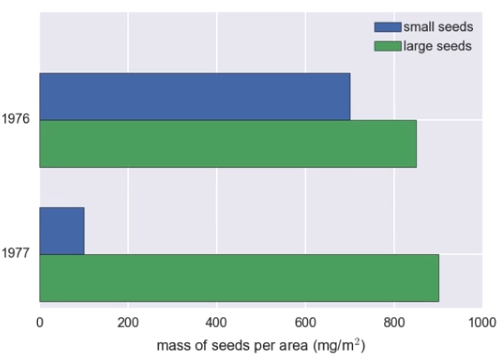

It is reasonable, therefore, to hypothesize that larger seeds required deeper beaks to crack them, so larger-beaked birds survived and reproduced. If this is the case, it stands to reason that the length of the beak might also change over time. Importantly, if the length and depth change at the same rate, the beak has the same shape; it just gets bigger. Let's conduct data analysis of how beak length and depth changed together.

###  (A) Linear regression for years 1975 and 2012

Perform a linear regression for both the 1975 and 2012 data. Then, generate 1,000 pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression lines for 1975 and 2012 separately.

Provide a clear printout of 95% confidence intervals for the slope and intercept in the years 1975 and 2012.

I have included below the function that we defined in the Class 14 workshop for creating bootstrap replicate estimates of slope and intercept. It takes as its input two arrays, and gives as output two arrays of the replicate slope and intercept estimates.

In [9]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

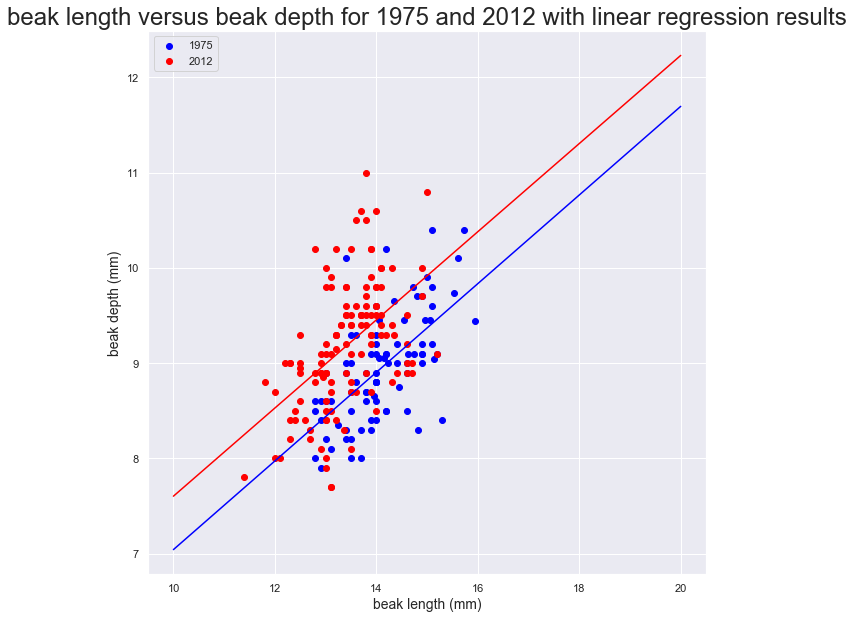

95% confidence interval on the slope of the regression line for 1975: [0.34098081 0.59954241]
95% confidence interval on the intercept of the regression line for 1975: [0.51643167 4.14571996]
95% confidence interval on the slope of the regression line for 2012: [0.32862749 0.59710242]
95% confidence interval on the intercept of the regression line for 2012: [1.19581229 4.80792376]


In [10]:
#figure size is set
plt.figure(figsize = (10, 10))

#scatter plot with beak length and beak depth from 1975 and 2012
plt.scatter(dfSpecific1975.blength, dfSpecific1975.bdepth, color = "blue", label = "1975")
plt.scatter(dfSpecific2012.blength, dfSpecific2012.bdepth, color = "red", label = "2012")

#legend
plt.legend(loc="best")

#title is created
plt.title("beak length versus beak depth for 1975 and 2012 with linear regression results", fontsize = 24)

#x and y labels are created
plt.xlabel("beak length (mm)", fontsize = 14)
plt.ylabel("beak depth (mm)", fontsize = 14)

#perform a linear regression using np.polyfit(): a, b
a1, b1 = np.polyfit(dfSpecific1975.blength, dfSpecific1975.bdepth, 1)
a2, b2 = np.polyfit(dfSpecific2012.blength, dfSpecific2012.bdepth, 1)

#variables are calculated
x1 = np.array([10,20])
y1 = a1 * x1 + b1

x2 = np.array([10,20])
y2 = a2 * x2 + b2

#linear regression line is added to plot
plt.plot(x1, y1, color = "blue")
plt.plot(x2, y2, color = "red")

#plot is shown
plt.show()

#slope and intercept is calculated
slope1975, intercept1975 = draw_bs_pairs_linreg(np.array(dfSpecific1975.blength), np.array(dfSpecific1975.bdepth), size=1000)
slope2012, intercept2012 = draw_bs_pairs_linreg(np.array(dfSpecific2012.blength), np.array(dfSpecific2012.bdepth), size=1000)
conf_intSlope1975 = np.percentile(slope1975, [2.5, 97.5])
conf_intIntercept1975 = np.percentile(intercept1975, [2.5, 97.5])
conf_intSlope2012 = np.percentile(slope2012, [2.5, 97.5])
conf_intIntercept2012 = np.percentile(intercept2012, [2.5, 97.5])

#print statements
print("95% confidence interval on the slope of the regression line for 1975:",conf_intSlope1975)
print("95% confidence interval on the intercept of the regression line for 1975:",conf_intIntercept1975)
print("95% confidence interval on the slope of the regression line for 2012:",conf_intSlope2012)
print("95% confidence interval on the intercept of the regression line for 2012:",conf_intIntercept2012)

### (B) Displaying the linear regression results

Now, you will display your linear regression results on a scatter plot. To do this, plot the 1975 and 2012 data, and plot them on a scatterplot as two different colors. Then take the first 100 bootstrap estimates of slope and intercept for each year and plot their lines. Make sure to use high transparency to be able to see the trends in the data. Be sure to include a legend so we know which color corresponds to each year.

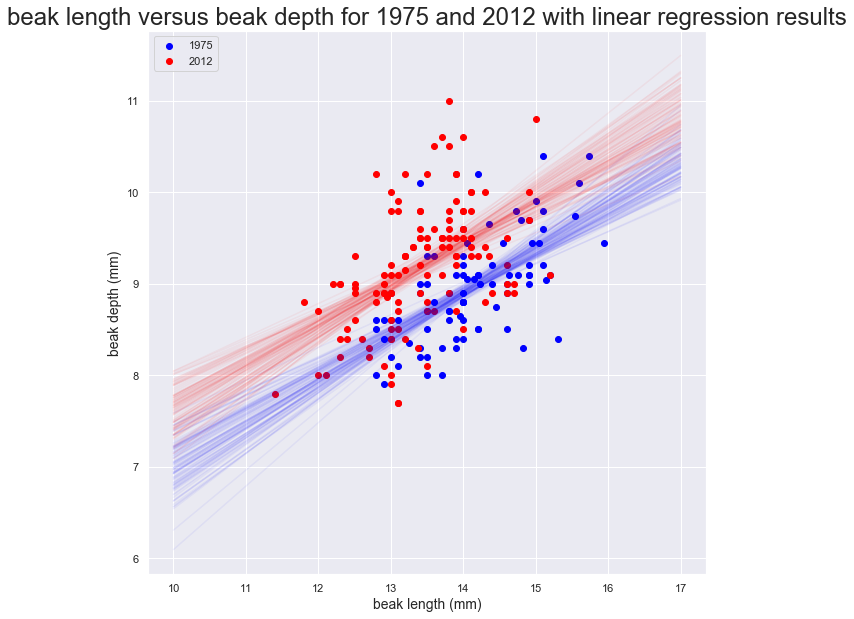

In [11]:
#figure size is set
plt.figure(figsize = (10, 10))

#scatter plot with beak length and beak depth from 1975 and 2012
plt.scatter(dfSpecific1975.blength, dfSpecific1975.bdepth, color = "blue", label = "1975")
plt.scatter(dfSpecific2012.blength, dfSpecific2012.bdepth, color = "red", label = "2012")

#title is created
plt.title("beak length versus beak depth for 1975 and 2012 with linear regression results", fontsize = 24)

#x and y labels are created
plt.xlabel("beak length (mm)", fontsize = 14)
plt.ylabel("beak depth (mm)", fontsize = 14)

#legend
plt.legend(loc="best")

#first 100 bootstrap estimates of slope and intercept is plotted
for i in range(100):
    x = np.array([10, 17])
    plt.plot(x, slope1975[i] * x + intercept1975[i], color = "blue", label = "1975", alpha = .05)
    
for i in range(100):
    x = np.array([10, 17])
    plt.plot(x, slope2012[i] * x + intercept2012[i], color = "red", label = "2012", alpha = .05)

#plot is shown
plt.show()

#### Conclusion

*Summarize the finding in your data analysis. Do you think your data support the drought theory above?*

My data supports the drought theory above. The drought theory states that beak depth and length needed to increase in order to adapt to the larger seed sizes following the fire in 1976/1977. On average, beak length and beak depth is larger in 2012 when compared to 1975.

## Problem 5: Beak Geometry

### (A)Calculating mean beak ratio for different years in the study

The linear regressions showed interesting information about the beak geometry. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison by generating two arrays (**ratio_1975** and **ratio_2012**) which contain the ratios of the beak length to depth for each bird in years 1975 and for 2012. Calculate the mean for the ratios in years 1975 and 2012 and print them out.

In [12]:
#two new arrays are generated with the ratio of the beak length to depth for each bird in years 1975 and for 2012
ratio_1975 = dfSpecific1975.blength/dfSpecific1975.bdepth
ratio_2012 = dfSpecific2012.blength/dfSpecific2012.bdepth

#mean ratios for 1975 and 2012 are calculated
ratio_1975Mean = np.mean(ratio_1975)
ratio_2012Mean = np.mean(ratio_2012)

#print statements
print("mean for the ratio in the year 1975:",ratio_1975Mean)
print("mean for the ratio in the year 2012:",ratio_2012Mean)

mean for the ratio in the year 1975: 1.5788823771858533
mean for the ratio in the year 2012: 1.4658342276847778


### (B) Distribution of beak ratio for different years

Generate 10,000 replicate bootstrap estimates of the beak ratio in years 1975 and 2012, using the two arrays we made in the last part of the problem (i.e., bootstrap from the arrays of ratios, not from the original arrays of length and depth). Plot a histogram of the distributions for 1975 and 2012 on the same set of axes (our sns.distplot() function from Lab 7 will be helpful here). Add the mean of the sample to each distribution as a dashed line.

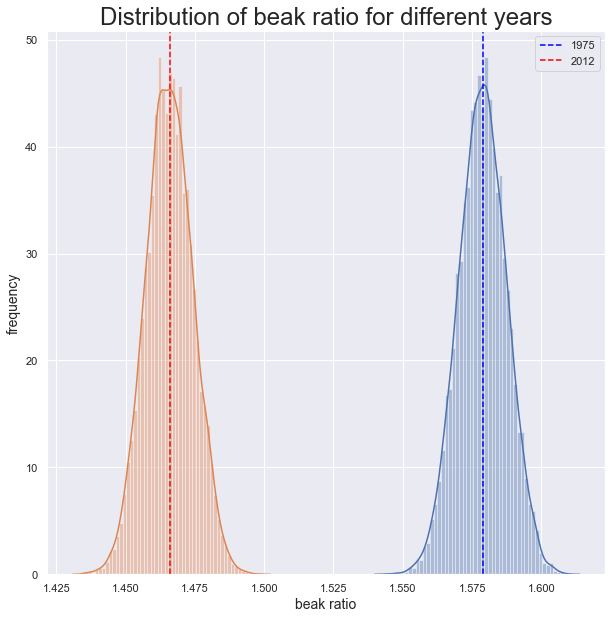

In [13]:
#figure size is set
plt.figure(figsize = (10, 10))

#10,000 bootstrap replicates are created
bs_replicates1975 = draw_bs_reps(ratio_1975, np.mean, size = 10000)
bs_replicates2012 = draw_bs_reps(ratio_2012, np.mean, size = 10000)

#sns distplot is created for 1975 and 2012 distribution
sns.distplot(bs_replicates1975)
sns.distplot(bs_replicates2012)

#title is created
plt.title("Distribution of beak ratio for different years", fontsize = 24)

#x and y labels are created
plt.xlabel("beak ratio", fontsize = 14)
plt.ylabel("frequency", fontsize = 14)

#dashed line is added
plt.axvline(x = ratio_1975Mean, color = "blue", linestyle = "--", label = "1975")
plt.axvline(x = ratio_2012Mean, color = "red", linestyle = "--", label = "2012")

#legend
plt.legend(loc="best")

#plot is shown
plt.show()

#### Conclusion B

*Do the two distributions for years 1975 and 2012 overlap? Interpret the overlap/non overlap of the distribution in the content of the problem.*

The two distributions for 1975 and 2012 do not overlap. The fact that the ratios do not overlap means that the beak length and depth have not changed at the same rate.